## Dragon Real Estate - Price Predictor

In [1]:
import pandas as pd
import numpy as np

In [2]:
import pandas as pd
housing=pd.read_csv(r"E:\AI Data Files\House Data in Csv.csv")
housing
housing.shape

(506, 14)

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       498 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
housing.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.283908,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704556,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.888000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623250,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       498 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [8]:
housing["AGE"]

0      65.2
1      78.9
2      61.1
3      45.8
4      54.2
       ... 
501    69.1
502    76.7
503    91.0
504    89.3
505    80.8
Name: AGE, Length: 506, dtype: float64

In [9]:
housing["AGE"].value_counts()

100.0    43
95.4      4
96.0      4
98.2      4
97.9      4
         ..
58.4      1
74.4      1
73.4      1
33.1      1
89.3      1
Name: AGE, Length: 356, dtype: int64

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

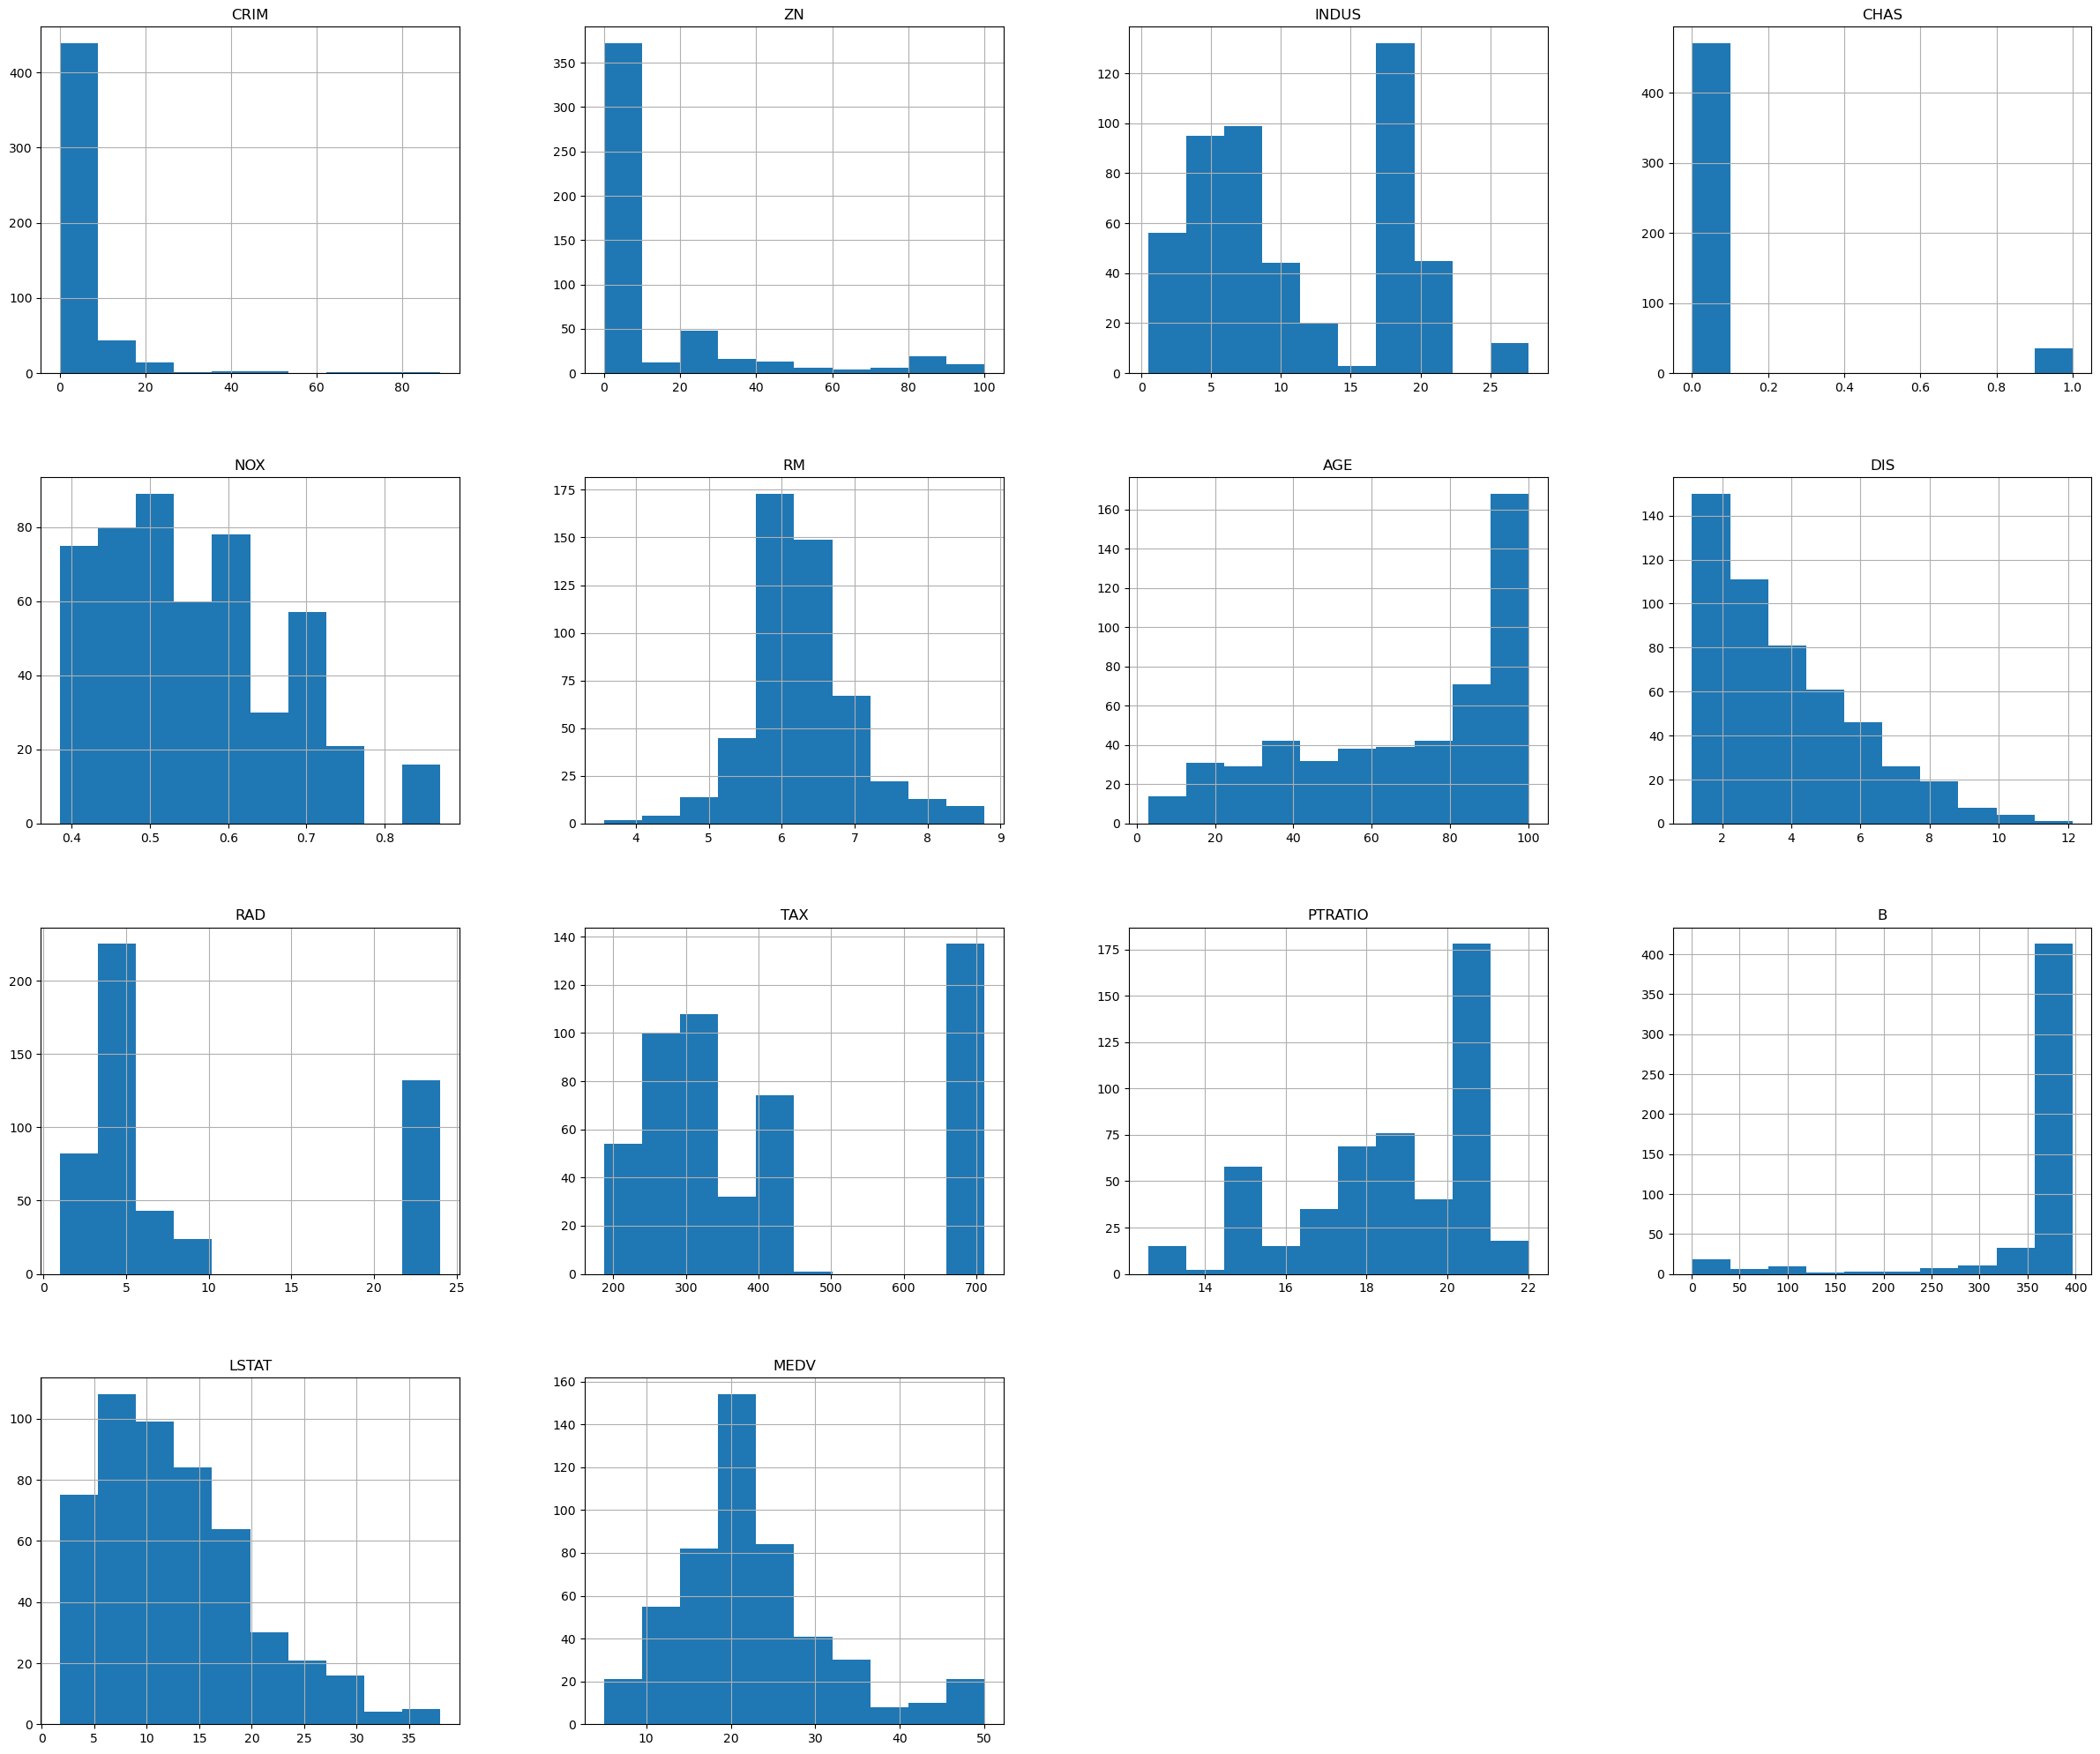

In [10]:
#For Histogram
import matplotlib.pyplot as plt
housing.hist(figsize=(30,25))

## Train- Test Spilliting


In [11]:
from sklearn.model_selection import train_test_split
train_set ,test_set =train_test_split(housing,test_size=0.2,random_state=42)
print(f"Length of train set  {len(train_set)}")
print(f"Length of train set  {len(test_set)}")
train_set["CHAS"].value_counts()

Length of train set  404
Length of train set  102


0    375
1     29
Name: CHAS, dtype: int64

## Train-Test Spilliting By using Stratified Shuffled Spilliting


In [12]:
#Stratified Shuffled Spilliting works only on specific data sets like "CHAS" here bcz it contain only two values and it is also beneficial only when using these kinds of columns othewise train_test_split works best and we dont need to dig into stratified shuffled spilliting
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=10,test_size=0.2,
                             random_state=42)
for train_index,test_index in sss.split(housing,housing["CHAS"]):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [13]:
strat_train_set["CHAS"].value_counts()
housing=strat_train_set.copy()

## Looking For Corelations


In [14]:
corr_matrix=housing.corr()
print(corr_matrix)
corr_matrix["MEDV"].sort_values(ascending=False)


             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.196458  0.403602 -0.050540  0.411437 -0.226419  0.362696   
ZN      -0.196458  1.000000 -0.523148 -0.022541 -0.506869  0.291122 -0.551449   
INDUS    0.403602 -0.523148  1.000000  0.086557  0.764696 -0.389968  0.663633   
CHAS    -0.050540 -0.022541  0.086557  1.000000  0.093634  0.137805  0.068810   
NOX      0.411437 -0.506869  0.764696  0.093634  1.000000 -0.284965  0.752238   
RM      -0.226419  0.291122 -0.389968  0.137805 -0.284965  1.000000 -0.213768   
AGE      0.362696 -0.551449  0.663633  0.068810  0.752238 -0.213768  1.000000   
DIS     -0.378670  0.640293 -0.696499 -0.097062 -0.781961  0.179941 -0.780359   
RAD      0.618543 -0.311174  0.600490  0.002693  0.600615 -0.229865  0.478343   
TAX      0.575933 -0.320954  0.733429 -0.018169  0.663711 -0.318056  0.539501   
PTRATIO  0.299934 -0.390005  0.406154 -0.111228  0.178127 -0.358589  0.257254   
B       -0.398619  0.161955 

MEDV       1.000000
RM         0.683572
ZN         0.333173
B          0.311240
DIS        0.222076
CHAS       0.207772
AGE       -0.336123
RAD       -0.386387
CRIM      -0.396302
NOX       -0.416011
TAX       -0.482972
INDUS     -0.483676
PTRATIO   -0.497808
LSTAT     -0.737963
Name: MEDV, dtype: float64

## Scatter Matrix Plot to Understand Coorelations more Effectively

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>,
        <AxesSubplot:xlabel='PTRATIO', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>,
        <AxesSubplot:xlabel='PTRATIO', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>,
        <AxesSubplot:xlabel='PTRATIO', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>,
        <AxesSubplot:xlabel=

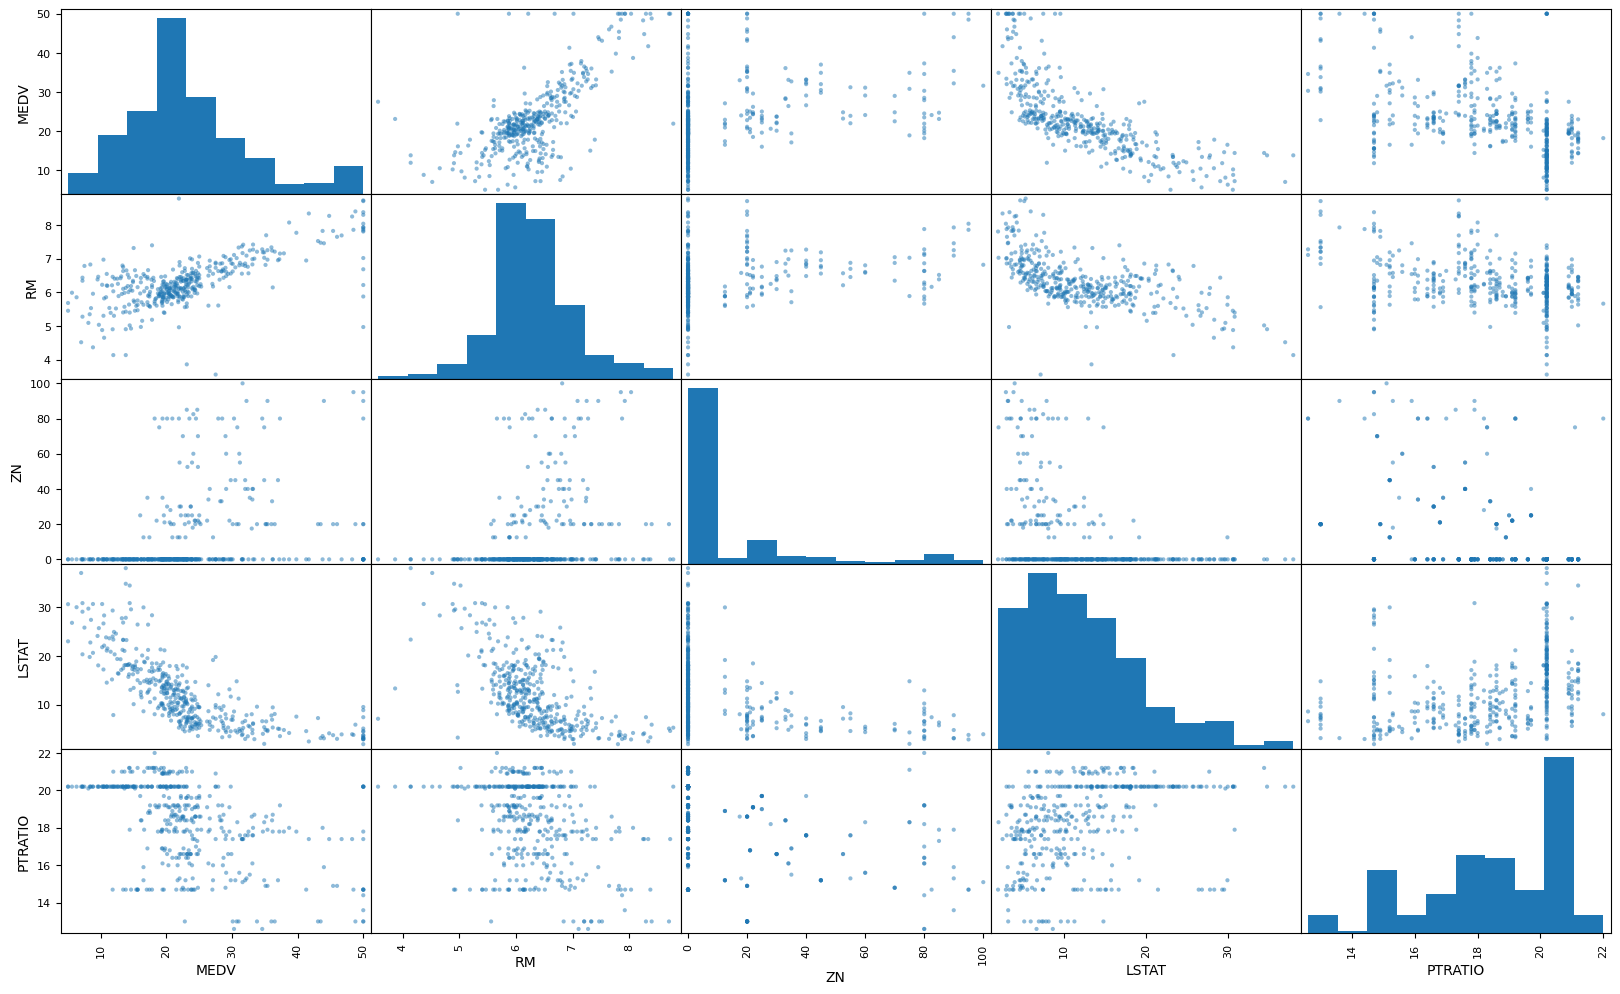

In [15]:
Attributes=["MEDV","RM","ZN","LSTAT","PTRATIO"]
pd.plotting.scatter_matrix(housing[Attributes],figsize=(20,12))

## After Analyzing we come up that MEDV and RM is very significant so we separate its graph

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

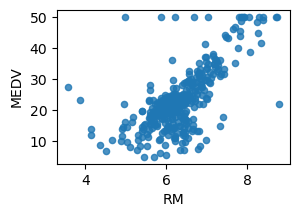

In [16]:
housing.plot(kind="scatter" , x='RM' , y='MEDV' , alpha =0.8 ,figsize=(3,2))

## Trying Out Different Housing Attributes To Understand Data More Effectively

In [17]:
housing['TAXRM']=housing["TAX"]/housing["RM"]
housing["TAXRM"]
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
313,0.26938,0.0,9.90,0,0.5440,6.266,82.8,3.2628,4,304,18.4,393.39,7.90,21.6,48.515800
444,12.80230,0.0,18.10,0,0.7400,5.854,96.6,1.8956,24,666,20.2,240.52,23.79,10.8,113.768364
356,8.98296,0.0,18.10,1,0.7700,6.212,97.4,2.1222,24,666,20.2,377.73,17.60,17.8,107.211848
36,0.09744,0.0,5.96,0,0.4990,5.841,61.4,3.3779,5,279,19.2,377.56,11.41,20.0,47.765794
27,0.95577,0.0,8.14,0,0.5380,6.047,88.8,4.4534,4,307,21.0,306.38,17.28,14.8,50.768976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0,48.119403
348,0.01501,80.0,2.01,0,0.4350,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
279,0.21038,20.0,3.33,0,0.4429,6.812,32.2,4.1007,5,216,14.9,396.90,4.85,35.1,31.708749
314,0.36920,0.0,9.90,0,0.5440,6.567,87.3,3.6023,4,304,18.4,395.69,9.28,23.8,46.292066


In [18]:
# Distributing data in x and y 
housing=strat_train_set.drop("MEDV",axis=1)
housing_labels=strat_train_set["MEDV"].copy()

## Missing Attributes

In [19]:
#To deal with Missing Attributes we have three options :
 #   1) Get Rid of Missing Data:
  #  2) Get Rid of Whole Attribute:
   # 3)Replace Missing Data with (0, Mean or Median)


In [20]:
a=housing.dropna(subset=["RM"]) #Option 1
a.shape

(398, 13)

In [21]:
housing.drop('RM',axis=1)  #Option 2

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
313,0.26938,0.0,9.90,0,0.5440,82.8,3.2628,4,304,18.4,393.39,7.90
444,12.80230,0.0,18.10,0,0.7400,96.6,1.8956,24,666,20.2,240.52,23.79
356,8.98296,0.0,18.10,1,0.7700,97.4,2.1222,24,666,20.2,377.73,17.60
36,0.09744,0.0,5.96,0,0.4990,61.4,3.3779,5,279,19.2,377.56,11.41
27,0.95577,0.0,8.14,0,0.5380,88.8,4.4534,4,307,21.0,306.38,17.28
...,...,...,...,...,...,...,...,...,...,...,...,...
163,1.51902,0.0,19.58,1,0.6050,93.9,2.1620,5,403,14.7,388.45,3.32
348,0.01501,80.0,2.01,0,0.4350,29.7,8.3440,4,280,17.0,390.94,5.99
279,0.21038,20.0,3.33,0,0.4429,32.2,4.1007,5,216,14.9,396.90,4.85
314,0.36920,0.0,9.90,0,0.5440,87.3,3.6023,4,304,18.4,395.69,9.28


In [22]:
median=housing["RM"].median()
housing["RM"].fillna(median, inplace=True) #option 3
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.765465,11.575495,10.939233,0.069307,0.553786,6.309394,67.549505,3.764232,9.378713,403.235149,18.318564,362.401411,12.260545
std,9.281380,23.426457,6.923286,0.254290,0.117126,0.721331,28.250917,2.058069,8.681153,169.490967,2.195004,82.176094,7.073648
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.920000
25%,0.071615,0.000000,4.930000,0.000000,0.448000,5.916250,42.375000,2.100525,4.000000,276.000000,16.800000,377.037500,6.642500
50%,0.218480,0.000000,8.560000,0.000000,0.528000,6.229000,73.450000,3.207450,5.000000,329.000000,18.700000,391.955000,10.665000
75%,3.569675,17.625000,18.100000,0.000000,0.631000,6.636750,94.500000,5.214600,24.000000,666.000000,20.200000,396.900000,16.245000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


## There is another Way of Replacing Null Values By Using SKlearn which will insure data will distribute accordingly

In [23]:
# This method is called imputing we have not applied this method here to learn this method watch End to End Machine Learnning By code with Harry from 1:47 to 1:56

## Scikit Learn Design 

sk learn primarily has three types of objects which make our ML programs 

1)Estimators 

2)Transformers

3)Predictors 

1) Estimators:

              It estimates some parameters based on data set Eg: Imputer
              It has a fit and transform method it means some estimators also work as transformers 
              i) Fit method fits the dataset and calculate  internal parameters
              
2) Transformers:

               It takes input and returns outpur based on the learnings from fit.It also acts as convenient function as    fit_transform()
               
3)Predictors: 

            It predicts the data like Linear Regression . fit() and predict() are two common functions . It will also gives the score function which will evaluate the model and its prediction on given data set . 

## Feature Scalling


Feature Scalling is a method which helps in making all the parameters on same scale which helps in making our ML program more effective . Like we are seeing that "RM" has range from 0 to 8 while "ZN" has range from 0 to 100 .

Primarily : there are two types of Feature Scalling 

1)Min-Max Scalling (Normalization):

             (Value-Min)/(Max-Min).
             
             SK Learn provides a class called MinMaxScaler.
             
2)Standardization:

              (Value-Min)/std.
              
              SK Learn provides a class called Standard Scaler.
              
Note: Standardization is best when we compare with Min-Max Scalling . We will done standadization in Pipe Line




## Creating A Pipe Line


In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipe = Pipeline([
    ('scaler', StandardScaler())
    #and as many as we want to apply automatically on data set . usually it applies on start of data 
                ])
housing_tr = pipe.fit_transform(housing)
housing_tr

array([[-0.37714436, -0.49473328, -0.15029298, ...,  0.03714646,
         0.37756738, -0.61721356],
       [ 0.97485937, -0.49473328,  1.0355843 , ...,  0.8582074 ,
        -1.4850126 ,  1.63193751],
       [ 0.5628435 , -0.49473328,  1.0355843 , ...,  0.8582074 ,
         0.18676472,  0.75577356],
       ...,
       [-0.38350905,  0.36006088, -1.10044099, ..., -1.55936092,
         0.4203335 , -1.04892601],
       [-0.36637615, -0.49473328, -0.15029298, ...,  0.03714646,
         0.40559076, -0.42188137],
       [-0.40307671,  1.21485505, -1.40124889, ...,  0.63013491,
         0.33443575, -0.90171914]])

## Selecting A Desired Model 

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(housing_tr,housing_labels)
model.score(housing_tr, housing_labels)

0.7402904657346895

## Now Check the predictions Randomly

In [26]:
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]
prepared_data=pipe.transform(some_data)
model.predict(prepared_data)
some_labels


313    21.6
444    10.8
356    17.8
36     20.0
27     14.8
Name: MEDV, dtype: float64

## Evaluating The Model Using Mean Squared Error

In [32]:

from sklearn.metrics import mean_squared_error
housing_predictions=model.predict(housing_tr)
mean_squared_error(housing_labels, housing_predictions)

23.23745652527573

# Using Better Evaluation Technique - Cross Validation

In [51]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_tr,housing_labels, cv=9)
scores

array([0.52894217, 0.67841322, 0.81836394, 0.79744815, 0.77632947,
       0.90686194, 0.85293851, 0.84138801, 0.82639813])

## Now Try Decision Tree Regression Model


In [37]:
from sklearn.tree import DecisionTreeRegressor #Method 1 of apply
model = DecisionTreeRegressor()
model.fit(housing_tr,housing_labels)
model.score(housing_tr, housing_labels)

1.0

In [35]:
from sklearn import tree #Method 2 of apply
clf = tree.DecisionTreeRegressor()
clf = clf.fit(housing_tr, housing_labels)
clf.score(housing_tr, housing_labels)

1.0

In [39]:
##Now Check the predictions Randomly

In [42]:
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]
prepared_data=pipe.transform(some_data)
model.predict(prepared_data)
some_labels

313    21.6
444    10.8
356    17.8
36     20.0
27     14.8
Name: MEDV, dtype: float64

# Evaluating The Model Using Mean Squared Error


In [38]:
from sklearn.metrics import mean_squared_error
housing_predictions=model.predict(housing_tr)
mean_squared_error(housing_labels, housing_predictions)

0.0

## Using Better Evaluation Technique - Cross Validation

In [49]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_tr,housing_labels, cv=9)
scores

array([0.60702546, 0.69530397, 0.81286229, 0.6909166 , 0.79232276,
       0.87526184, 0.81305572, 0.82135285, 0.80853877])

## Now Saving Data By Using JobLib

In [52]:
from joblib import dump, load
>>> dump(model, 'Dragon.joblib') 

['Dragon.joblib']

## Now do testing Which is remaining and watch video 2:51 to 3:06